# Аппроксимация функции.

In [1]:
import numpy as np
from scipy.optimize import curve_fit

Данная функция:

In [2]:
def f ( a , b , c , x):
    
    function = c * ( 1 + ( ( x - a ) / b )**2 ) ** (-1) 
    
    return function

Начальные условия:

In [3]:
xa = - 2                                          # левая граница
xb = 2                                            # правая граница
a = 0.5   
b = 1                                             # параметры функции
c = 2
s = 0.05                                          # среднеквадратичное отклонение
dots = 20;   xx = np.linspace ( xa , xb , dots )  # разбиение

Генерирование шума:


In [4]:
np.random.seed ( 42 )

In [15]:
noise = np.random.normal(loc = 0 , scale = s, size = xx.size)
yy = [ f ( a, b , c, x) for x in xx]
data = yy + 1.5 * noise       # готовая имитация экспериментальных данных ( a , b , c )

Нахождение искомых значений коэффициентов через функцию curve_fit:

In [23]:
values, matrix = curve_fit ( f , xx , data ,  ( 1 , 1 , 1 ) )

In [25]:
b , c , a = values
print(values)

[ 0.95885324  1.98528303  0.455704  ]


Графически это выглядит следующим образом:

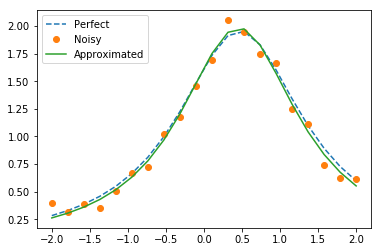

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot (xx, yy, '--', label = 'Perfect')
plt.plot (xx, data, 'o', label = 'Noisy')
plt.plot (xx, f (a , b , c , xx) , label = 'Approximated' )
plt.legend (loc ='best' )